# Redução de Dados

Gerenciar e processar dados requer tempo, esforço e recursos significativos, especialmente ao lidar com grandes volumes de dados de várias fontes e em diferentes formatos. Para enfrentar tais desafios, técnicas de Redução de dados são aplicadas, auxiliando na análise de dados com alta dimensionalidade. As estratégias para redução de dados buscam aumentar a eficiência de análises e reduzir os custos de armazenamento e processamento de dados. Nesta seção, vamos explorar alguns dos métodos de redução de dimensão mais comumente aplicados em Ciência de Dados.

In [1]:
# Importando o pacote necessário
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


## Redução de dimensionalidade

É o processo de reduzir o número de dimensões de um conjunto de dados. Existem diferentes algoritmos de redução de dimensionalidade, mas nenhum método é único e ideal para todos os casos. Os diferentes algoritmos de redução de dimensionalidade podem ser divididos em duas categorias principais, Feature Selection e Feature Extraction. Nesta seção, nós exploraremos os principais métodos existentes nas duas categorias.

### Feature Selection

Feature selection é o processo de seleção de um subconjunto de features relevantes para uso na construção de modelos de Aprendizado de Máquina. Tal processo pode aumentar o desempenho dos modelos, eliminando features irrelevantes, redundantes ou altamente correlacionados. A biblioteca \textit{scikit-learn} inclui diferentes estratégias para realizar a seleção automática de features. Especificamente, as classes do módulo `sklearn.feature_selection` podem ser usadas tanto para melhorar a precisão dos modelos, quanto para impulsionar o desempenho em conjuntos de dados com alta dimensionalidade.

Uma das abordagens mais simples disponíveis no módulo é a remoção de features com baixa variância. Utilizando a classe `VarianceThreshold`, nós removemos todas as features cuja variância não atende a um limite especificado. Se o limite não for especificado, por padrão, o método remove todas as features de variância zero, ou seja, atributos que possuem o mesmo valor em todas as amostras. No exemplo a seguir, nós selecionamos as features que possuem uma variância maior que 0,1.

In [2]:
# Lendo os dados
data = pd.read_table('../dataset/spotify_hits_dataset_complete.tsv', encoding='utf-8')

# Selecionando apenas variáveis numéricas
df = data.select_dtypes(include=np.number)
print(df.columns.values) # imprimindo as colunas restantes

['popularity' 'track_number' 'num_artists' 'num_available_markets'
 'duration_ms' 'key' 'mode' 'time_signature' 'acousticness' 'danceability'
 'energy' 'instrumentalness' 'liveness' 'loudness' 'speechiness' 'valence'
 'tempo']


In [3]:

array = df.values # converte em uma matriz
X = array[:, 1:17] # treino (X)
y = array[:, 0] # teste (y)
resultado = VarianceThreshold(threshold=0.1).fit_transform(X) # remove features de baixa variância
num_features = np.shape(X)[1]  # matriz original
num_selec_features = np.shape(resultado)[1]  # matriz filtrada
print("Número de features inicialmente: ", num_features,
      "\nNúmero de features selecionadas: ", num_selec_features)

Número de features inicialmente:  16 
Número de features selecionadas:  8


Outra abordagem comumente usada é a seleção univariada, que seleciona os melhores atributos com base em testes estatítisticos univariados. Nesta abordagem, cada atributo é examinado individualmente para determinar a força da relação entre o atributo e a variável de resposta. A classe `SelectKBest` do módulo `sklearn.feature_selection` é um bom exemplo de seleção univariada, onde são selecionadas apenas as $k$ maiores features de um conjunto de dados com base em um teste estatístico. No exemplo a seguir, nós utilizamos a classe em nosso conjunto de dados para selecionar $k = 10$ features de acordo com a Análise de Variância (Anova).

In [4]:

resultado = SelectKBest(f_classif, k=10).fit_transform(X, y) # seleciona k=10 features
num_features = np.shape(X)[1]  # matriz original
num_selec_features = np.shape(resultado)[1]  # matriz filtrada
print("Número de features inicialmente: ", num_features,
      "\nNúmero de features selecionadas: ", num_selec_features)

Número de features inicialmente:  16 
Número de features selecionadas:  10


Observe que, após o processo de seleção, o conjunto de treinamento apresenta as dez features que atingiram as melhores pontuações no teste estatístico escolhido. Uma desvantagem desse método é a dificuldade em escolher o número $k$ ideal. Abordagens alternativas mais avançadas incluem os algoritmos *Backward Elimination*, *Forward Selection* e *Recursive Feature Elimination* (ou RFE). Além desses algoritmos, uma outra forma simples e comumente utilizada de selecionar features relevantes é através de uma Matriz de Correlação. No entanto, iremos discutir em detalhes tal abordagem nas Seções X e Y. 

### Feature Extraction

Feature Extraction é o processo de extração de features, onde é gerado um conjunto novo e menor de atributos que captura a maioria das informações úteis. Isto é, enquanto a seleção de features apenas mantém um subconjunto dos atributos originais, a extração de recursos gera novos atributos. As técnicas de extração de features são divididas em métodos lineares e não-lineares. Os métodos lineares combinam linearmente os recursos originais para compactar as dimensões do conjunto de dados original. A Análise de Componentes Principais (PCA) é um dos métodos mais simples e, de longe, o mais comum para a redução da dimensionalidade. Em particular, o PCA é um algoritmo não supervisionado que cria combinações lineares dos atributos originais, classificadas em ordem de sua variância explicada. No exemplo a seguir, nós utilizamos a biblioteca *scikit-learn* para importar o módulo `sklearn.decomposition`. Em seguida, nós usamos a classe `PCA` para extrair os dois componentes principais `(n_components = 2)` do nosso conjunto de dados.

In [5]:

# Padronizando os dados de treino
X = StandardScaler().fit_transform(X)
# Calculando os dois componentes principais
pca_resultado = PCA(n_components=2)
df_pcs = pd.DataFrame(pca_resultado.fit_transform(X), columns=['PC1', 'PC2'])
df_pcs.tail()

,PC1,PC2
1279,-1.848746,-1.361856
1280,5.266716,1.026617
1281,0.451366,-1.150981
1282,-0.780667,0.101453
1283,-2.273107,0.817602


O *DataFrame* resultante apresenta os valores dos dois componentes principais para todas as 1283 amostras. Observe que o conjunto de dados foi padronizado, utilizando a classe `StandardScaler`. Do contrário, os atributos em maior escala dominariam os novos componentes principais. Após a extração dos componentes principais, você pode encontrar a variância explicada. Ou seja, o método fornece a quantidade de informações ou variação que cada componente principal mantém depois de projetar os dados em um subespaço de dimensão inferior.

In [6]:
print('Variação explicada por componentes principais: {}'.format(
    pca_resultado.explained_variance_ratio_))

Variação explicada por componentes principais: [0.17349221 0.08862283]


O primeiro componente principal da saída anterior detém 17,3% das informações, enquanto o segundo detém apenas 9% das informações. Ou seja, ao reduzir a dimensionalidade do conjunto de dados para duas dimensões, 73,7% das informações originais foram perdidas.

Ao contrário dos métodos lineares, os métodos não-lineares são mais complexos. Exemplos comuns incluem o t-Distributed Stochastic Neighbor Embedding (t-SNE), autoencoders, IsoMap e UMap. Aqui, focaremos apenas no t-SNE que, ao contrário do PCA, não é uma técnica matemática e sim probabilística. Essencialmente, o método minimiza a divergência entre duas distribuições, mapeando os dados multidimensionais para um espaço dimensional inferior. No exemplo a seguir, utilizando o módulo `sklearn.manifold` e a classe `TSNE`, também reduzimos nosso conjunto de dados em duas dimensões.

In [7]:

# Reduzindo a dimensão para duas
tSNE_resultado = TSNE(n_components=2)
tSNE = pd.DataFrame(
    tSNE_resultado.fit_transform(X), 
    columns=['tSNE1', 'tSNE2'])
tSNE.tail()

,tSNE1,tSNE2
1279,9.103629,-3.113597
1280,-17.664431,-40.606129
1281,-21.541874,-51.378647
1282,-14.644680,29.997019
1283,35.986511,28.855595


## Redução de numerosidade

É uma técnica de redução de dados usada para reduzir o volume de dados usando abordagens adequadas de representação de dados. Essas abordagens podem ser divididas em métodos paramétricos ou não-paramétricos. De forma geral, nos métodos paramétricos, um modelo é usado para estimar os dados, de modo que apenas parâmetros sejam armazenados, em vez dos dados reais. Já os métodos não-paramétricos são usados para armazenar representações reduzidas dos dados, como por exemplo, histogramas, \textit{Clustering}, amostragem e \textit{Data Cube Aggregation}.

Exemplos clássicos de métodos paramétricos são os modelos de regressão e log-linear, podendo ser usados para aproximar os dados fornecidos. Na regressão linear, por exemplo, os dados são modelados para se ajustar a uma linha reta. No exemplo a seguir, considere que o atributo `duration_ms` é a nossa variável independente e o atributo `popularity` é a variável dependente. Utilizando o módulo `sklearn.linear_model`, nós aplicamos a classe `LinearRegression` para ajustar os dados em nosso modelo de regressão linear. Em seguida, nós plotamos um gráfico de dispersão, onde a variável dependente, `popularity`, é modelada como uma função linear da variável `duration_ms`, representada pela linha reta em vermelho.

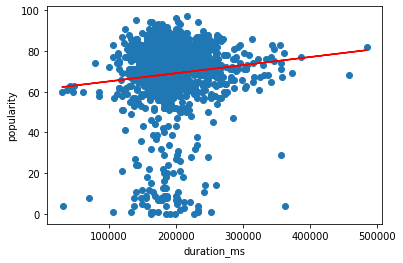

In [8]:

X = array[:, 4].reshape(-1, 1)  # duration_ms
y = array[:, 0].reshape(-1, 1)  # popularity
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)
Y_pred = linear_regressor.predict(X)
plt.scatter(X, y) # gráfico de dispersão
plt.plot(X, Y_pred, color='red') # resultado da regressão linear
plt.xlabel("duration_ms")
plt.ylabel("popularity")
plt.show()

Como exemplo de métodos não-paramétricos, podemos listar algumas das técnicas de amostragem mais comuns ao se trabalhar com dados. Começando pela **amostragem aleatória simples**, considere que precisamos selecionar um subconjunto de uma população em que cada membro do subconjunto tenha a mesma probabilidade de ser escolhido. A seguir, criamos uma amostra com apenas cinco registros a partir do conjunto de dados e, depois, especificamos o tamanho da amostra através de um percentual.

In [9]:
# Amostragem aleatória simples
sample_df = data.sample(5)
sample_df.shape

(5, 24)

In [10]:
# Amostragem aleatória de 10%
df_amostra = data.sample(frac=0.10)
df_amostra.shape

(128, 24)

Considere agora que precisamos dividir toda a população em diferentes grupos ou estratos diferentes, de maneira que um indivíduo só pode fazer parte de um único grupo e nenhum desses indivíduos pode ficar de fora de um estrato. Além disso, a seleção de cada um dos indivíduos é feita de forma aleatória. A seguir, realizamos a **amostragem estratificada** selecionando aleatoriamente duas músicas de cada tipo de música.

In [11]:
# Amostragem estratificada 
df_amostra = data.groupby('song_type', group_keys=False).apply(lambda x: x.sample(2))
df_amostra.shape

(4, 24)

Por último, a **amostragem sistemática** consiste em escolher um indivíduo inicialmente de forma aleatória entre a população e, posteriormente, selecionar para amostra cada enésimo indivíduo disponível. A seguir, utilizando a biblioteca *Numpy*, geramos a semente aleatória e, em seguida, os índices a serem amostrados.

In [12]:
semente = np.random.choice(10, 1) # semente aleatória de 0 a 10
indices = np.arange(0, 100, semente) # array de 0 a 100, em intervalos de 5
amostra = data.loc[indices, :] # amostra a partir dos índices
amostra.shape

(17, 24)

## Conclusão

Este notebook apresentou como reduzir a dimensionalidade dos dados.

Este foi o fim desta parte do tutorial sobre prepação de dados. A próxima parte ([4.Ciencia.de.Dados](../4.Ciencia.de.Dados/4.1.Analise.Exploratoria.ipynb)) apresentará como fazer analise exploratória dos dados como parte da ciência de dados.

